<a href="https://colab.research.google.com/github/jdlozanom/deep-learning-experiments/blob/master/Voice_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Updated notebook at repository: https://github.com/jdlozanom/deep-learning-experiments/blob/master/Voice_recognition.ipynb

# Init

In [2]:
!pip install pytube3
!pip install -U librosa

     |████████████████████████████████| 1.6MB 4.3MB/s 
  Created wheel for librosa: filename=librosa-0.7.2-cp36-none-any.whl size=1612885 sha256=ba6a5af6fba59137a73e64b87e430d5ae918dcbf331bd78c93a3d6261e1ee0ef
  Stored in directory: /root/.cache/pip/wheels/4c/6e/d7/bb93911540d2d1e44d690a1561871e5b6af82b69e80938abef
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [0]:
from pytube import YouTube
import os
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
import pandas as pd

import IPython
from IPython.display import Audio

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Video download

In [0]:
videos_dict = {
    "errejon" : ['AjiHJNRz7BQ', 'yQzapET06cA', 'mt1YrvamC9c','Zx6fZ7XwnIg','_-oQ85JmzAI'],
    "casado" : ['eMJvJZo8t0U','hn5RYH94O74', 'HJZJIEJBwHU', 'yfqQ2YSculg','FbqXVMabwx8'],
    "sanchez" : ['r8Jk70Mo_10','TdUuzUR_mBM', '1t53omZSGwY','54jcoRjqJnw','CG7fHbhiY6w'],
    "arrimadas" : ['eK13K9wpSmw','hLCQvH5iiA8','9k3S1P6yU_k','bleasmBwPmk','lv-XwbaDHDE'],
    "abascal" : ['M5jkThdskT4','8Kufi9BxLI4','NgdEwEf9Imk','WTYHTHFCvL0','6IIj8IbeFuA'],
    "iglesias" : ['HBbCQnDwNBc','Dp-1lAoMd5I','_hFm83S1RaE','QcIt1F8oUS4','KJ19erX1L_4']
}

In [0]:
def dowload_video(video_list):
  for video_name in video_list:
    video = YouTube('https://www.youtube.com/watch?v={}'.format(video_name))
    video.streams.filter(type = "audio", file_extension = "mp4").all()[0].download(filename=video_name)

In [6]:
keys = list(videos_dict.keys())
for k in keys:
  dowload_video(videos_dict[k])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function all (This object can be treated as a list, all() is useless).
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function all (This object can be treated 

In [0]:
VIDEOS_PATH = '.'
VIDEOS_EXTENSION = '.mp4' 
AUDIO_EXT = 'wav'

EXTRACT_VIDEO_COMMAND = ('ffmpeg -i "{from_video_path}" '
                         '-f {audio_ext} -ab 32k -ac 1 -ss 6 '
                         '-vn "{to_audio_path}"')

os.chdir(VIDEOS_PATH)
files = os.listdir(VIDEOS_PATH)
for f in files:
    if not f.endswith(VIDEOS_EXTENSION):
        continue

    audio_file_name = '{}.{}'.format(f[:-len(VIDEOS_EXTENSION)], AUDIO_EXT)
    command = EXTRACT_VIDEO_COMMAND.format(
        from_video_path=f, audio_ext=AUDIO_EXT, to_audio_path=audio_file_name,
    )
    os.system(command)

assert len([f for f in os.listdir(VIDEOS_PATH) if f.endswith(AUDIO_EXT)]) == sum([len(v) for v in videos_dict.values()])
os.system('rm *mp4')

# Data Exploration

In [0]:
y, sr = librosa.load('TdUuzUR_mBM.wav')
S = librosa.feature.melspectrogram(y=y, sr=sr)

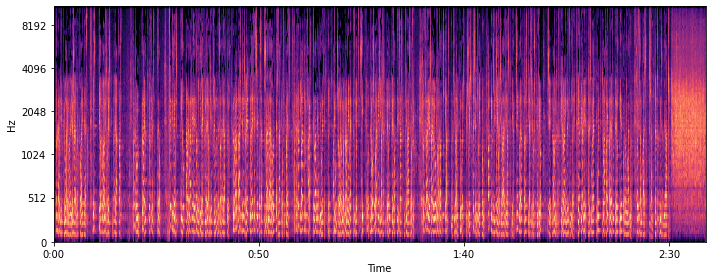

In [0]:
plt.figure(figsize=(10, 4))
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                       y_axis='mel', sr=sr)

plt.tight_layout()
plt.show()

In [0]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=128)
mfccsscaled = np.mean(mfccs.T,axis=1)

df = pd.DataFrame(mfccs[:,0:128])
df = pd.DataFrame(mfccs)
df

NameError: ignored

In [0]:
#df_out = df.loc[:,df.iloc[0] != -480.182159]
df_out = df.loc[:,df.iloc[0] > mfccs.min()*3/5]

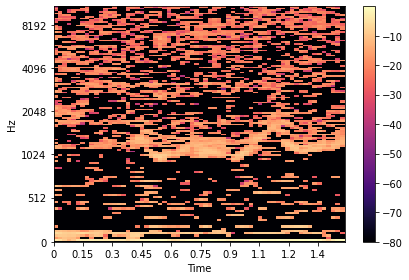

In [0]:
#librosa.display.specshow(df_out.values[:,0:128], x_axis='time')
S_dB = librosa.power_to_db(df_out.values[:,:64], ref=np.max)
librosa.display.specshow(S_dB, x_axis='time',
                       y_axis='mel', sr=sr)

plt.colorbar()
plt.tight_layout()
plt.show()

In [0]:
audio = librosa.feature.inverse.mfcc_to_audio(df_out.values[:,0:64])
librosa.output.write_wav('new.wav', audio, sr=21500)
IPython.display.display(Audio('new.wav'))

/usr/local/lib/python3.6/dist-packages/librosa/output.py:198: DeprecationWarning: librosa.output.write_wav
	Deprecated as of librosa version 0.7.0.
	It will be removed in librosa version 0.8.
  def write_wav(path, y, sr, norm=False):


# Data prep


In [42]:
X = []
y = []
source = []

keys = list(videos_dict.keys())
for person_id, person in enumerate(keys):
  for audio_id in videos_dict[person]:
    print(person_id, person, audio_id)
    audio_ts, sr = librosa.load(f'{audio_id}.wav')
    mfccs = librosa.feature.mfcc(y=audio_ts, sr=sr, n_mfcc=128)
    df = pd.DataFrame(mfccs)
    df_out = df.loc[:,df.iloc[0] > mfccs.min()*3/5]

    audio_len = mfccs.shape[1]
    for i in range(0, audio_len - (audio_len // 5), 64):
      X.append(mfccs[:,i:i+64].ravel())
      y.append(person_id)
      source.append(audio_id)

0 errejon AjiHJNRz7BQ
0 errejon yQzapET06cA
0 errejon mt1YrvamC9c
0 errejon Zx6fZ7XwnIg
0 errejon _-oQ85JmzAI
1 casado eMJvJZo8t0U
1 casado hn5RYH94O74
1 casado HJZJIEJBwHU
1 casado yfqQ2YSculg
1 casado FbqXVMabwx8
2 sanchez r8Jk70Mo_10
2 sanchez TdUuzUR_mBM
2 sanchez 1t53omZSGwY
2 sanchez 54jcoRjqJnw
2 sanchez CG7fHbhiY6w
3 arrimadas eK13K9wpSmw
3 arrimadas hLCQvH5iiA8
3 arrimadas 9k3S1P6yU_k
3 arrimadas bleasmBwPmk
3 arrimadas lv-XwbaDHDE
4 abascal M5jkThdskT4
4 abascal 8Kufi9BxLI4
4 abascal NgdEwEf9Imk
4 abascal WTYHTHFCvL0
4 abascal 6IIj8IbeFuA
5 iglesias HBbCQnDwNBc
5 iglesias Dp-1lAoMd5I
5 iglesias _hFm83S1RaE
5 iglesias QcIt1F8oUS4
5 iglesias KJ19erX1L_4


In [7]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,8152,8153,8154,8155,8156,8157,8158,8159,8160,8161,8162,8163,8164,8165,8166,8167,8168,8169,8170,8171,8172,8173,8174,8175,8176,8177,8178,8179,8180,8181,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,-480.182159,-480.182159,-290.081421,-171.076416,-148.080750,-161.484772,-163.561325,-169.615448,-209.097961,-257.430725,-273.901581,-271.854767,-144.432327,-65.753784,-37.518650,-11.991090,-5.670176,-12.893175,-23.185570,-68.549530,-143.761169,-34.438896,14.469350,-23.555553,-100.712448,-104.810951,-141.128281,-135.021683,-118.982407,-124.172768,-116.303055,-100.780991,-101.230721,-108.220764,-103.945107,-112.715256,-125.666885,-150.361694,-189.640045,-196.527298,...,-3.970100,-2.102600,0.991539,2.462685,0.993000,-0.768871,-0.337372,-2.366211,-3.292934,-2.864803,-0.981659,0.532970,-0.126583,-0.502228,-2.481369,-1.947685,-1.003403,-1.252907,-2.958179,0.091740,1.724461,-0.663862,0.438191,-1.078495,1.019577,-0.191711,-1.944817,2.333672,2.599174,1.039940,-1.231499,-0.324234,-0.540947,1.207077,0.173073,-0.065773,0.272909,-2.417505,-2.011077,-2.148685
1,-153.203079,-91.830849,-81.569115,-111.970665,-147.749023,-166.618393,-146.952881,-134.859497,-133.230591,-143.973846,-160.524551,-154.857422,-138.006958,-157.867645,-191.851746,-179.611816,-178.535736,-192.276367,-219.151184,-256.247650,-228.160980,-163.375809,-132.989929,-137.009979,-148.062180,-157.819641,-184.322327,-239.328583,-222.793900,-176.851074,-176.666290,-189.604355,-187.516006,-181.828903,-195.735672,-212.795547,-193.466202,-189.360489,-172.497543,-121.200310,...,-1.846321,-1.298347,-4.020126,-3.738663,-1.693321,-2.021217,-2.561584,-3.341087,-2.946129,-3.758453,-1.072334,-1.151215,-0.694962,-2.494499,-2.159309,0.210533,0.685572,1.715855,2.389362,1.950695,-0.029617,-0.714249,0.895233,0.023422,-0.235344,0.882320,-1.094761,1.496407,1.631210,1.419281,0.192757,-1.304893,-2.524902,-1.967659,-0.685577,-0.579514,-1.287872,-0.352966,0.537003,-0.170284
2,-122.322136,-122.474609,-129.054276,-122.354614,-96.903732,-90.057175,-133.000198,-175.468094,-161.357300,-133.836487,-117.182121,-114.461441,-113.570244,-113.847061,-120.407814,-110.162025,-96.617027,-107.973312,-131.088318,-142.894897,-166.471069,-199.900909,-186.165405,-144.724487,-131.671356,-131.754898,-153.786652,-173.974686,-130.942337,-101.884659,-86.412941,-87.845955,-95.665527,-140.649460,-159.336487,-112.223785,-87.313599,-99.734772,-110.056969,-119.088730,...,-0.758183,-2.124832,-1.739098,-1.551804,-0.589104,0.153206,-0.512161,0.100693,-0.434250,-0.551163,0.974556,0.687469,-1.388748,-0.394562,-2.305672,-1.054398,-2.756531,-1.800789,-0.295334,1.098953,-0.678917,-1.700668,-1.220169,-2.181118,-0.074787,-0.194908,0.333237,-0.863785,1.306618,0.345871,-2.518845,-1.562607,-0.372688,0.667877,0.301216,-1.881386,-2.054260,0.485672,0.350182,1.302803
3,-120.821320,-138.726959,-177.980286,-219.346466,-184.008575,-127.039520,-103.781639,-87.427689,-98.928764,-141.832306,-154.845886,-131.789261,-81.894928,-68.846390,-70.592743,-81.625023,-98.918709,-123.296272,-161.628723,-205.582901,-159.731995,-57.412407,-45.545700,-106.387062,-147.837357,-151.097183,-107.350388,-68.798965,-58.610710,-68.482834,-70.886307,-91.036888,-122.822762,-135.428864,-122.597855,-106.330254,-100.823051,-79.062088,-73.559311,-102.431602,...,-3.116447,-4.720581,-4.820274,-1.949734,0.127333,0.973308,0.752388,0.078239,0.093994,-4.287926,-4.981316,-2.744919,-3.890793,-3.067986,-2.488953,-1.950356,-1.587830,-1.992493,-3.308189,-3.379539,1.074768,1.352989,1.722290,1.589912,1.392639,1.490608,2.193779,-0.923363,0.471737,-0.356935,0.303644,0.544952,1.762829,-0.817230,0.108002,4.244675,2.532646,-0.183434,1.206665,0.934578
4,-191.528015,-183.144257,-203.421097,-228.210632,-249.089630,-265.456848,-283.794830,-273.137482,-237.435806,-226.353516,-245.120224,-270.351471,-230.747879,-207.305969,-206.394455,-221.165588,-179.914047,-148.082733,-129.854507,-122.61646

In [0]:
def save_proccessed():
  pd.DataFrame(X).to_csv('X_backup.csv')

save_proccessed()

In [0]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

transformer = Normalizer().fit(X)

#X_train, X_test, y_train, y_test = train_test_split(transformer.transform(X), y, test_size=0.33, random_state=42)

In [0]:
first_speechs = [a[0] for a in videos_dict.values()]

In [0]:
first_speechs = [a[0] for a in videos_dict.values()]
X_df = pd.DataFrame(transformer.transform(X))
y_df = pd.DataFrame(y)
first_speech_df = pd.DataFrame(source).isin(first_speechs)

X_train = X_df.loc[first_speech_df[first_speech_df[0] == False].index]
X_test = X_df.loc[first_speech_df[first_speech_df[0] == True].index]

y_train = y_df.loc[first_speech_df[first_speech_df[0] == False].index]
y_test = y_df.loc[first_speech_df[first_speech_df[0] == True].index]

# Non NN classifier

In [0]:
sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train, y_train)

print(neigh.predict(X_test))
#y_test


[5 5 1 5 5 1 5 1 5 5 3 5 3 5 3 5 3 1 1 5 5 3 5 3 5 5 5 3 5 1 4 5 5 5 5 3 5
 5 1 1 1 3 1 1 5 5 3 5 3 5 5 5 3 5 5 3 5 5 1 5 5 2 5 1 5 1 5 5 5 1 5 5 1 5
 3 4 5 5 1 5 1 5 5 5 5 5 5 1 5 1 5 5 5 5 1 3 5 5 5 5 5 3 5 4 5 3 3 5 5 4 1
 1 5 5 5 5 3 5 5 5 5 5 5 3 5 5 3 5 5 5 5 3 1 1 1 4 4 3 1 5 5 1 4 1 5 3 5 5
 1 5 1 1 5 5 1 5 5 5 1 5 1 5 5 5 5 3 5 3 1 1 1 5 1 1 1 5 5 5 3 5 5 3 5 5 1
 5 5 1 5 4 5 5 5 2 5 5 5 5 3 5 5 5 3 5 1 5 1 1 5 5 5 3 5 3 5 3 5 5 3 5 5 5
 3 3 1 3 3 5 3 3 3 5 5 3 1 5 1 5 3 5 3 3 1 4 1 5 5 1 1 3 5 5 1 5 5 3 5 1 5
 3 1 3 1 5 5 1 3 5 5 3 5 3 5 5 1 3 1 1 5 5 1 1 5 5 5 1 3 5 3 5 5 1 5 3 5 5
 5 5 1 4 5 3 5 3 5 5 5 4 5 5 5 1 5 5 5 5 1 3 3 1 1 5 5 1 5 5 1 5 3 1 5 5 5
 5 3 5 5 5 5 1 1 1 3 5 5 5 3 3 3 3 5 5 5 1 5 3 5 3 5 3 3 5 5 5 5 5 5 1 5 3
 1 5 5 1 5 5 3 5 5 1 3 5 5 1 3 5 1 5 5 5 3 5 5 5 5 3 5 1 5 5 5 5 5 3 1 3 5
 1 5 1 5 1 5 3 5 5 5 1 5 5 5 5 5 5 5 5 5 5 3 5 5 3 5 5 3 5 5 5 3 5 5 3 5 1
 5 1 5 5 5 1 5 5 5 5 1 5 1 5 5 1 5 1 5 5 2 5 1 5 5 5 0 5 5 5 5 1 1 5 1 1 5
 3 5 1 5 1 3 5 1 3 5 1 5 

In [0]:
from sklearn.metrics import accuracy_score
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.7734806629834254

# Keras

In [0]:
def plot_history(history):
  fig = plt.figure(figsize=(10,3))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.plot(history.history['accuracy'])
  ax1.plot(history.history['val_accuracy'])
  ax1.title.set_text('model accuracy')
  ax1.set_ylabel('accuracy')
  ax1.set_xlabel('epoch')

  ax2.plot(history.history['loss'])
  ax2.plot(history.history['val_loss'])
  ax2.title.set_text('model loss')
  ax2.set_ylabel('loss')
  ax2.set_xlabel('epoch')


  plt.legend(['train', 'test'])
  plt.show()

In [0]:
y_train = keras.utils.to_categorical(y_train, 6)
y_test = keras.utils.to_categorical(y_test, 6)

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 100)               819300    
_________________________________________________________________
dense_76 (Dense)             (None, 6)                 606       
Total params: 819,906
Trainable params: 819,906
Non-trainable params: 0
_________________________________________________________________
None
Train on 5836 samples, validate on 507 samples
Epoch 1/500
5836/5836 [==============================] - 1s 152us/step - loss: 1.7612 - accuracy: 0.2407 - val_loss: 1.9199 - val_accuracy: 0.0966
Epoch 2/500
5836/5836 [==============================] - 1s 140us/step - loss: 1.6499 - accuracy: 0.3292 - val_loss: 1.8444 - val_accuracy: 0.0710
Epoch 3/500
5836/5836 [==============================] - 1s 139us/step - loss: 1.5782 - accuracy: 0.3951 - val_loss: 1.6946 - val_accuracy: 0.1913
Epoch 4/500
5836

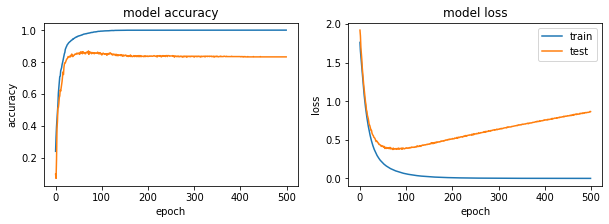

In [215]:
model = Sequential()
model.add(Dense(100,input_shape=(64*128,),activation='sigmoid'))
model.add(Dense(6, activation='softmax'))

print(model.summary())
EPOCH = 500
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCH, batch_size=256, verbose=1)

plot_history(history)

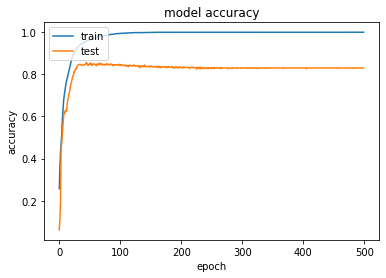

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

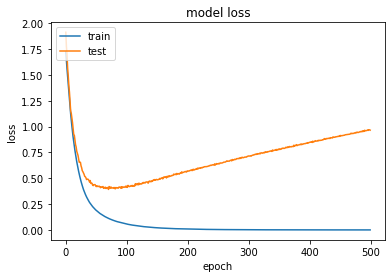

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_62"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 200)               1638600   
_________________________________________________________________
dense_74 (Dense)             (None, 6)                 1206      
Total params: 1,639,806
Trainable params: 1,639,806
Non-trainable params: 0
_________________________________________________________________
None
Train on 5836 samples, validate on 507 samples
Epoch 1/100
5836/5836 [==============================] - 1s 227us/step - loss: 1.7264 - accuracy: 0.3182 - val_loss: 1.8446 - val_accuracy: 0.0631
Epoch 2/100
5836/5836 [==============================] - 1s 215us/step - loss: 1.6025 - accuracy: 0.3629 - val_loss: 1.7983 - val_accuracy: 0.0828
Epoch 3/100
5836/5836 [==============================] - 1s 215us/step - loss: 1.5075 - accuracy: 0.4426 - val_loss: 1.6173 - val_accuracy: 0.3708
Epoch 4/100


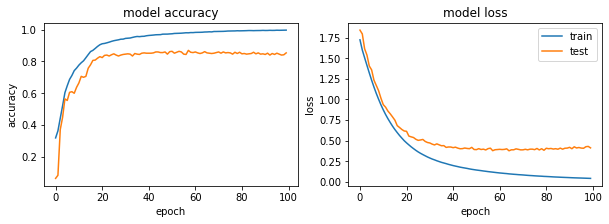

In [214]:
model = Sequential()
model.add(Dense(200,input_shape=(64*128,),activation='sigmoid'))
model.add(Dense(6, activation='softmax'))

print(model.summary())
EPOCH = 100
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCH, batch_size=256, verbose=1)

plot_history(history)

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 200)               1638600   
_________________________________________________________________
dense_69 (Dense)             (None, 6)                 1206      
Total params: 1,639,806
Trainable params: 1,639,806
Non-trainable params: 0
_________________________________________________________________
None
Train on 5836 samples, validate on 507 samples
Epoch 1/80
5836/5836 [==============================] - 1s 225us/step - loss: 1.6588 - accuracy: 0.3031 - val_loss: 1.6914 - val_accuracy: 0.2525
Epoch 2/80
5836/5836 [==============================] - 1s 210us/step - loss: 1.3978 - accuracy: 0.5211 - val_loss: 1.3965 - val_accuracy: 0.5661
Epoch 3/80
5836/5836 [==============================] - 1s 253us/step - loss: 1.1489 - accuracy: 0.6703 - val_loss: 1.1075 - val_accuracy: 0.6331
Epoch 4/80
5836

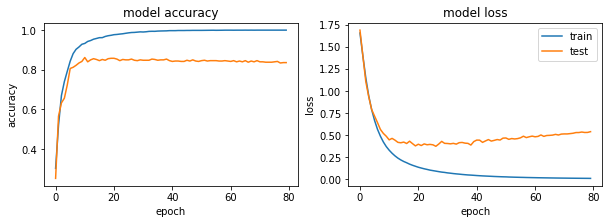

In [212]:
model = Sequential()
model.add(Dense(200,input_shape=(64*128,),activation='relu'))
model.add(Dense(6, activation='softmax'))

print(model.summary())
EPOCH = 80
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCH, batch_size=256, verbose=1)

plot_history(history)

Model: "sequential_61"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 100)               819300    
_________________________________________________________________
dense_71 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_72 (Dense)             (None, 6)                 126       
Total params: 821,446
Trainable params: 821,446
Non-trainable params: 0
_________________________________________________________________
None
Train on 5836 samples, validate on 507 samples
Epoch 1/80
5836/5836 [==============================] - 1s 149us/step - loss: 1.7306 - accuracy: 0.4167 - val_loss: 1.6209 - val_accuracy: 0.5266
Epoch 2/80
5836/5836 [==============================] - 1s 140us/step - loss: 1.5487 - accuracy: 0.5194 - val_loss: 1.4325 - val_accuracy: 0.5661
Epoch 3/80
5836/5836 [===========

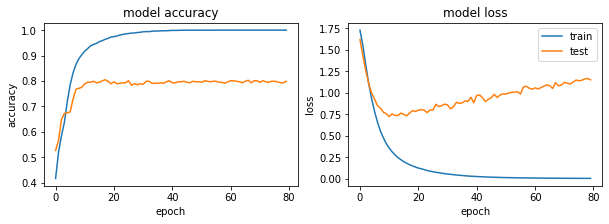

In [213]:
model = Sequential()
model.add(Dense(100,input_shape=(64*128,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(6, activation='softmax'))

print(model.summary())
EPOCH = 80
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCH, batch_size=256, verbose=1)

plot_history(history)

In [58]:
model = Sequential()
model.add(Dense(500,input_shape=(64*128,),activation='relu'))
model.add(Dense(6, activation='sigmoid'))

print(model.summary())
EPOCH = 20
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=EPOCH, batch_size=256, verbose=1)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 500)               4096500   
_________________________________________________________________
dense_27 (Dense)             (None, 6)                 3006      
Total params: 4,099,506
Trainable params: 4,099,506
Non-trainable params: 0
_________________________________________________________________
None
Train on 5836 samples, validate on 507 samples
Epoch 1/20
5836/5836 [==============================] - 3s 469us/step - loss: 1.6621 - accuracy: 0.3268 - val_loss: 1.6833 - val_accuracy: 0.0848
Epoch 2/20
5836/5836 [==============================] - 3s 473us/step - loss: 1.3296 - accuracy: 0.5687 - val_loss: 1.1953 - val_accuracy: 0.5286
Epoch 3/20
5836/5836 [==============================] - 3s 462us/step - loss: 0.9092 - accuracy: 0.7455 - val_loss: 0.8528 - val_accuracy: 0.6864
Epoch 4/20
5836/

# CNN

In [0]:
model.save('voice_model.h5')

In [210]:
from keras.layers import Conv2D, MaxPool2D
model = Sequential()
model.add(Conv2D(16, (3,3), input_shape=(128,64,1),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

print(model.summary())
EPOCH = 80
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train.values.reshape(-1,128,64,1), y_train, validation_data=(X_test.values.reshape(-1,128,64,1), y_test), epochs=EPOCH, batch_size=256, verbose=1)

Model: "sequential_59"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 126, 62, 16)       160       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 63, 31, 16)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 61, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 30, 14, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 28, 12, 64)        18496     
_________________________________________________________________
flatten_20 (Flatten)         (None, 21504)             0         
_________________________________________________________________
dense_66 (Dense)             (None, 32)              

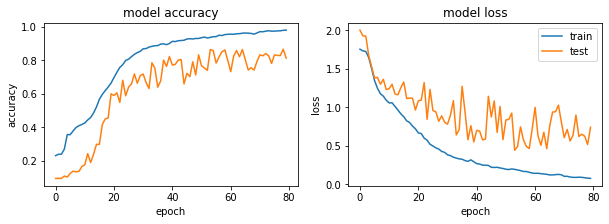

In [211]:
plot_history(history)